In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\somas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [6]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [7]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 200


In [8]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  39
negative number:  102
neutral number:  59


In [9]:
tweet_list[0:20]

,0
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
2,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
5,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
6,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
7,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
9,"@J4viiKal Con Quantumania es cuando dije ""hast..."


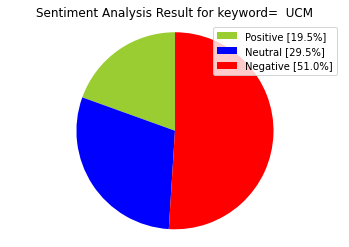

In [10]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [11]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [12]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...","RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
9,"@J4viiKal Con Quantumania es cuando dije ""hast...","@J4viiKal Con Quantumania es cuando dije ""hast..."
10,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
12,@EnriiqueM_ Ay Dios… pa mi es la trilogía más ...,@EnriiqueM_ Ay Dios… pa mi es la trilogía más ...
14,RT @MarvelLatin: Luego de analizarlo\n\n#Guard...,RT @MarvelLatin: Luego de analizarlo\n\n#Guard...
15,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
16,"#GuardiansOfTheGalaxyVol3 es un PELICULÓN, me ...","#GuardiansOfTheGalaxyVol3 es un PELICULÓN, me ..."
17,RT @AndresEHernnde1: En Villa Clara hoy defien...,RT @AndresEHernnde1: En Villa Clara hoy defien...


In [13]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
4,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
9,"@J4viiKal Con Quantumania es cuando dije ""hast...",con quantumania es cuando dije hasta aqu ...
10,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
12,@EnriiqueM_ Ay Dios… pa mi es la trilogía más ...,ay dios pa mi es la trilog a m s aburrida ...
14,RT @MarvelLatin: Luego de analizarlo\n\n#Guard...,luego de analizarlo guardiansofthegalaxyvol...
15,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
16,"#GuardiansOfTheGalaxyVol3 es un PELICULÓN, me ...",guardiansofthegalaxyvol3 es un pelicul n me ...
17,RT @AndresEHernnde1: En Villa Clara hoy defien...,en villa clara hoy defiende su tesis doctoral...


In [14]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
4,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
9,"@J4viiKal Con Quantumania es cuando dije ""hast...",con quantumania es cuando dije hasta aqu ...,0.0,0.000000,positive,0.000,0.859,0.141,0.4215
10,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,@EnriiqueM_ Ay Dios… pa mi es la trilogía más ...,ay dios pa mi es la trilog a m s aburrida ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
14,RT @MarvelLatin: Luego de analizarlo\n\n#Guard...,luego de analizarlo guardiansofthegalaxyvol...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
15,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
16,"#GuardiansOfTheGalaxyVol3 es un PELICULÓN, me ...",guardiansofthegalaxyvol3 es un pelicul n me ...,0.0,0.000000,negative,0.190,0.690,0.121,-0.1531
17,RT @AndresEHernnde1: En Villa Clara hoy defien...,en villa clara hoy defiende su tesis doctoral...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [15]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [16]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,27,54.0
positive,14,28.0
negative,9,18.0


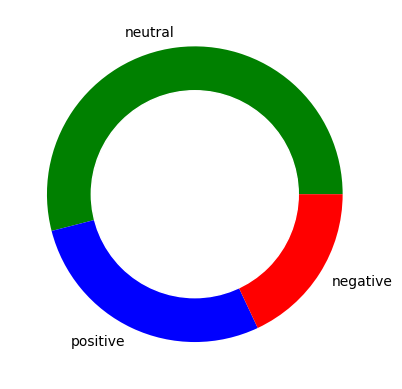

In [18]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



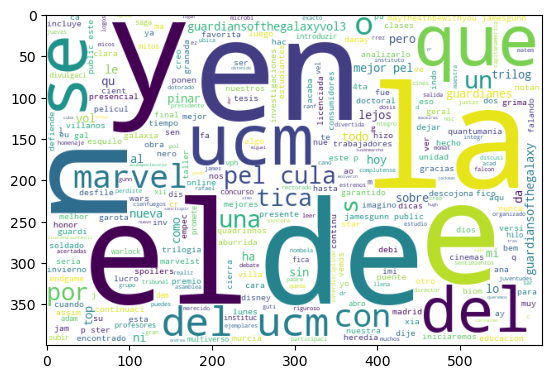

In [20]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

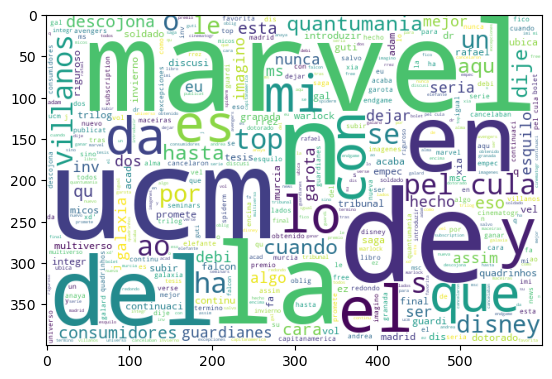

In [21]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

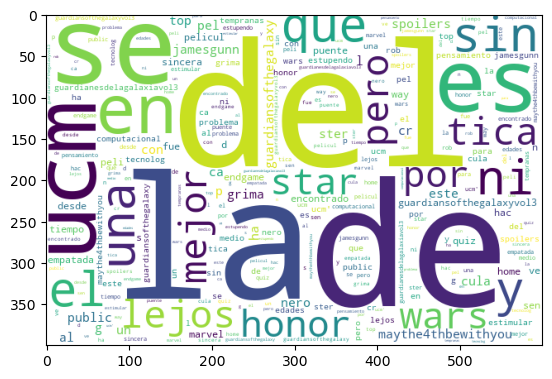

In [22]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

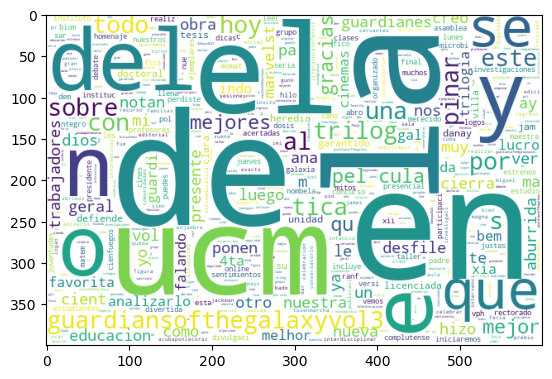

In [23]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)